# Introduction to Data Visualization in Python

Welcome! In this tutorial, we are going to be looking at the wine quality dataset (https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) and using Python data visualization tools in order to model wine quality on various physiochemical tests.

## Import Packages

If any of these packages are not already installed, just run `pip3 install *pkg name*`

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Pre-processing the Data

Download the wine quality CSVs (red wine & white wine) from the following links: 
* red wine = https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
* white wine = https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

Move the CSVs to the same directory as this notebook.

In [204]:
## loading red wine csv
red_wine = pd.read_csv('winequality-red.csv', sep=';')

## TODO: load the white wine csv using pandas
white_wine = pd.read_csv('winequality-white.csv', sep=';')

Let's concatenate the `red_wine` and `white_wine` dataframes into a `wine` dataframe.

In [205]:
## Add a label for red wine versus white wine
red_wine['type'] = 'red'
white_wine['type'] = 'white'

## TODO: concatenate both dataframes
wines = pd.concat([red_wine, white_wine], axis=0,)

## shuffle rows of dataframe
wines = wines.sample(frac=1).reset_index(drop=True)

In [206]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.2,0.20,0.31,1.0,0.031,22.0,73.0,0.99035,3.24,0.52,11.3,6,white
1,7.1,0.72,0.00,1.8,0.123,6.0,14.0,0.99627,3.45,0.58,9.8,5,red
2,6.9,0.21,0.81,1.1,0.137,52.0,123.0,0.99320,3.03,0.39,9.2,6,white
3,7.0,0.29,0.49,3.8,0.047,37.0,136.0,0.99380,2.95,0.40,9.4,6,white
4,8.5,0.44,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4,5,red


As can be seen above, each wine dataset has the results of multiple physiochemical tests, alongside a continuous quality. 

Let's discretize this continuous variable as follows (quality_label): 
* low: value <= 5
* med: 5 < value <= 7 
* high: value > 7

In [207]:
quality_label = []
for value in wines['quality']:
    ## TODO: assign quality label array
    if value <= 5: 
        quality_label.append('low')
    elif value > 5 and value <= 7: 
        quality_label.append('med')
    else: 
        quality_label.append('high')

wines['quality_label'] = quality_label

In [208]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,6.2,0.20,0.31,1.0,0.031,22.0,73.0,0.99035,3.24,0.52,11.3,6,white,med
1,7.1,0.72,0.00,1.8,0.123,6.0,14.0,0.99627,3.45,0.58,9.8,5,red,low
2,6.9,0.21,0.81,1.1,0.137,52.0,123.0,0.99320,3.03,0.39,9.2,6,white,med
3,7.0,0.29,0.49,3.8,0.047,37.0,136.0,0.99380,2.95,0.40,9.4,6,white,med
4,8.5,0.44,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4,5,red,low


# 1D Visualization:

## Univariate Analysis

Analyze one data attribute/variable & visualize. 

Let's create a histogram for each numeric attribute!

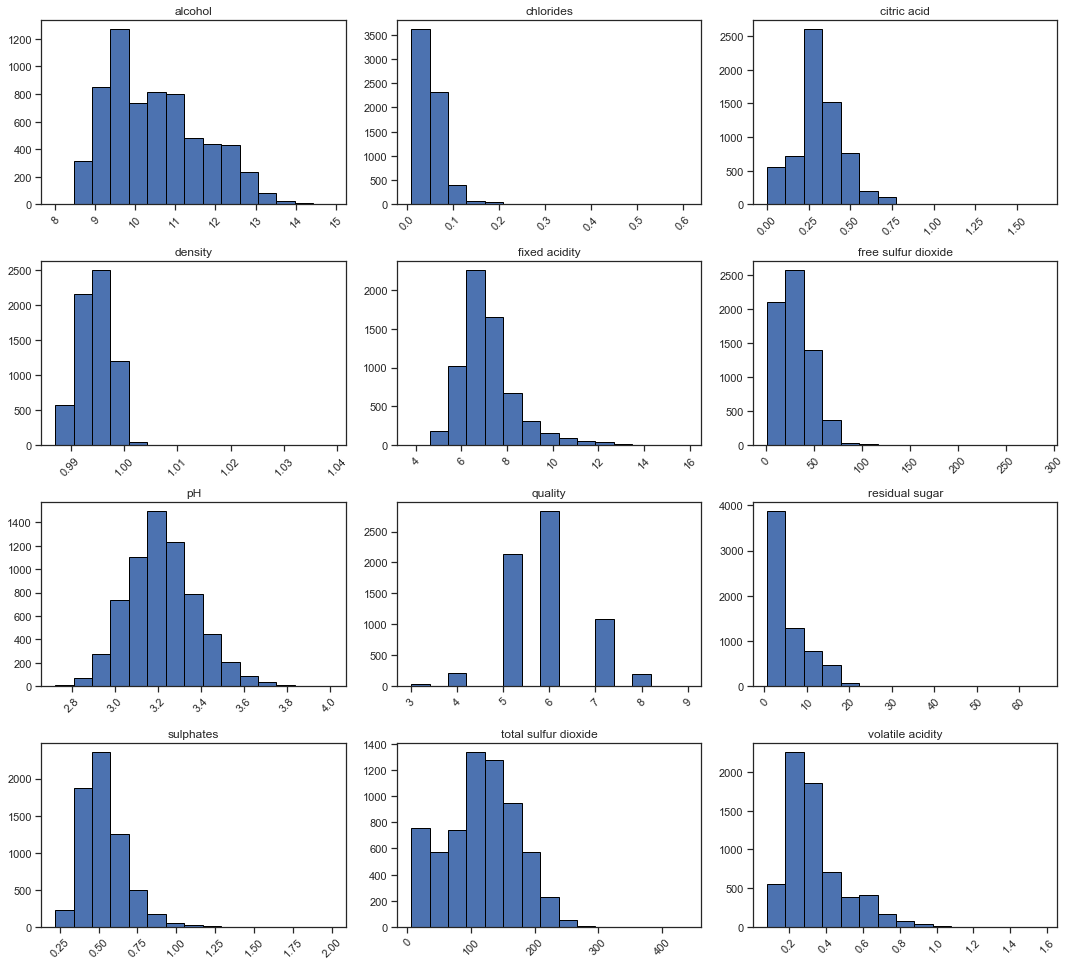

In [209]:
fig = wines.hist(bins=15,
                 edgecolor='black', 
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))   

## Continuous Numeric Attribute

Let's analyze a continuous, numeric attribute (i.e. citric acid content)

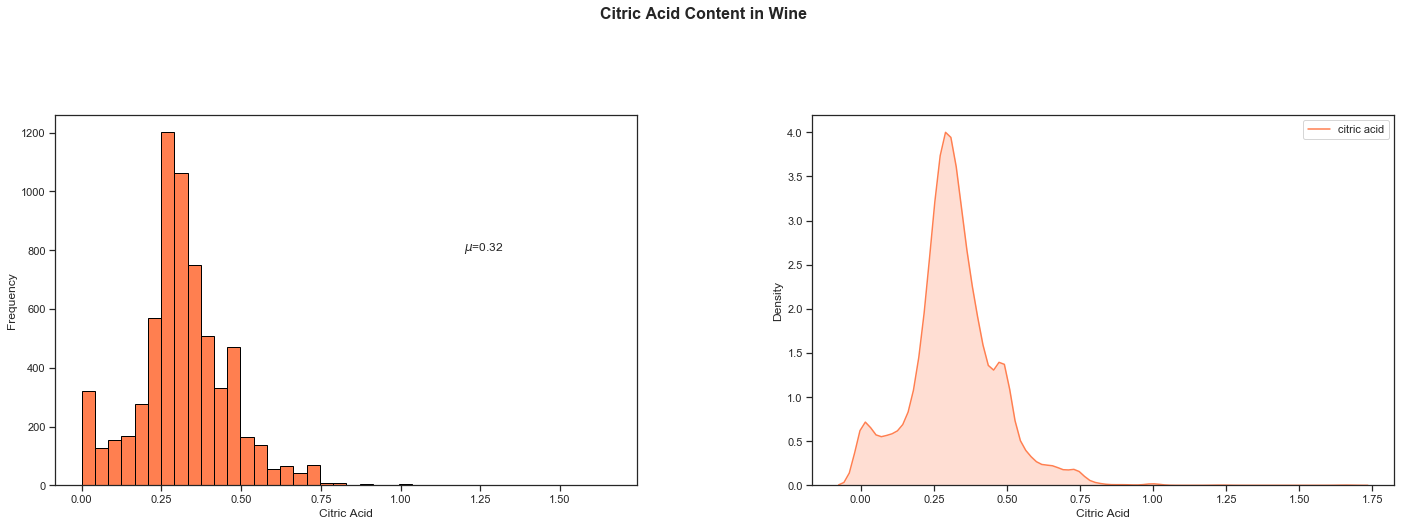

In [210]:
## create figure
fig = plt.figure(figsize=(24, 15))
title = fig.suptitle("Citric Acid Content in Wine", fontsize=16, fontweight='bold')
fig.subplots_adjust(top=0.88, wspace=0.3)

## histogram of continuous variable
ax1 = fig.add_subplot(221)
ax1.set_xlabel("Citric Acid")
ax1.set_ylabel("Frequency")

## TODO: calculate the mean & add as text attribute
citric_acid_mean = round(wines['citric acid'].mean(), 2)
ax1.text(x=1.2, y=800, 
         s=r'$\mu$='+str(citric_acid_mean), 
         fontsize=12)

freq, bins, patches = ax1.hist(wines['citric acid'], 
                               bins=40,
                               color='coral',
                               edgecolor='black')

## density plot of continuous variable
ax2 = fig.add_subplot(222) 
ax2.set_xlabel("Citric Acid")
ax2.set_ylabel("Density") 
## TODO: use kdeplot to plot the density graph
sns.kdeplot(wines['citric acid'], ax=ax2, shade=True, color='coral')

## Discrete Categorical Attribute

Let's analyze a discrete, categorical attribute (i.e. quality)

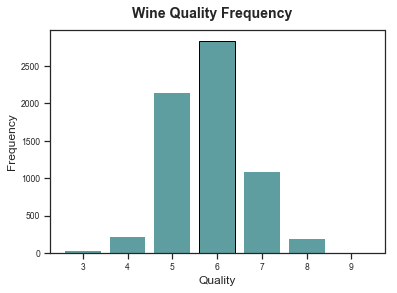

In [211]:
## create a figure
fig = plt.figure(figsize=(6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)

## TODO: calculate the values within the bin
quality_counts = wines['quality'].value_counts()

## TODO: plot barchart using ax.bar
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
ax.tick_params(axis='both', which='major', labelsize=8.5)

bar = ax.bar(quality_counts.index,
             quality_counts.values,
             color='cadetblue', 
             edgecolor='black', linewidth=1)

# 2D Visualization:

Let's look at finding potential relationships/correlations between data attributes. 

In order to do this, let's start by creating a heatmap from a correlation matrix!

## Heatmap

Text(0.5,0.98,'Wine Attributes Correlation Heatmap')

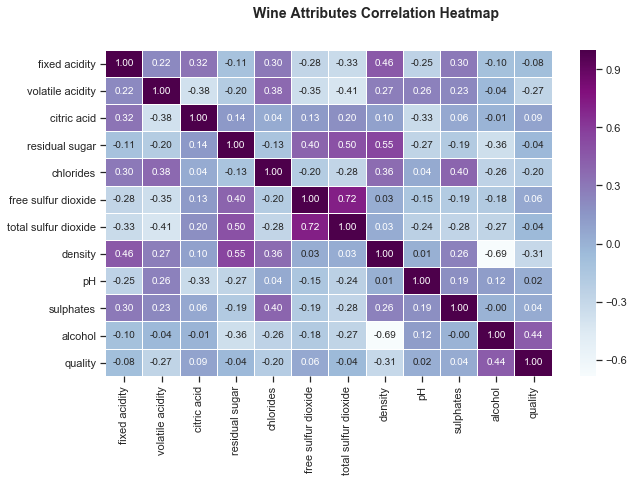

In [212]:
## TODO: calculate correlation matrix 
corr = wines.corr()

## create figure
fig, ax = plt.subplots(1, 1, figsize=(10,6))

## TODO: create a heatmap
heatmap = sns.heatmap(corr, 
                 ax=ax,           
                 cmap="BuPu", 
                 annot=True, 
                 fmt='.2f',       
                 linewidths=.05)

fig.suptitle('Wine Attributes Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

Let's pick the most strongly correlated attributes to analyze. 

These are: density, residual sugar, total sulfur dioxide, free sulfur dioxide, and fixed acidity

## Pair Plot

Text(0.5,0.98,'Wine Attributes Pairwise Plots')

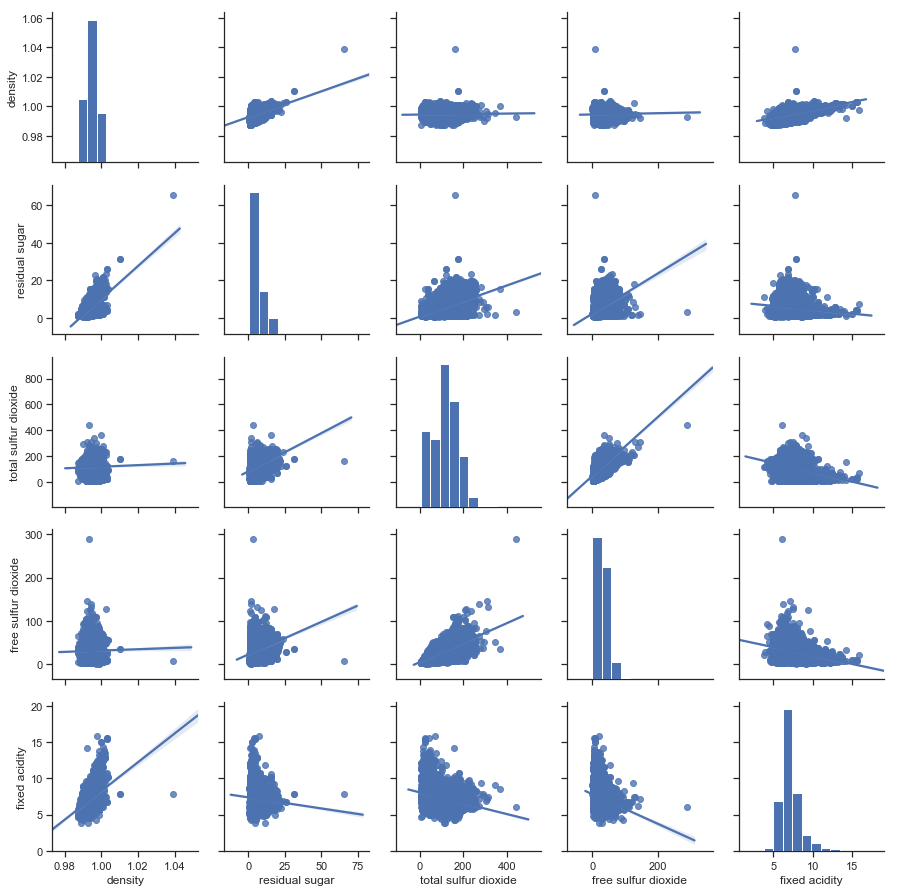

In [213]:
## TODO: define attributes of interest
cols = ['density', 
        'residual sugar', 
        'total sulfur dioxide', 
        'free sulfur dioxide', 
        'fixed acidity']

## TODO: create a pairplot using seaborn's pairplot function
sns.pairplot(wines[cols], kind='reg')

fig = pairplot.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Wine Attributes Pairwise Plots', 
              fontsize=14, fontweight='bold')

## Continuous Numeric Attributes

Let's look at the correlation between fixed acidity & density!

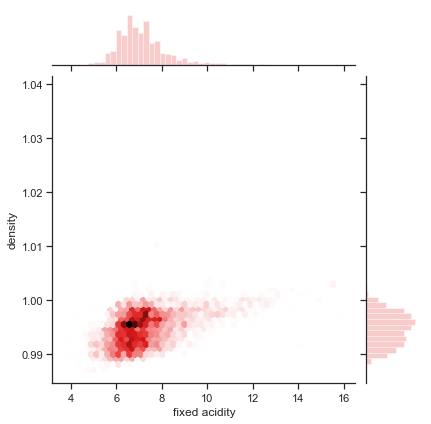

In [214]:
## TODO: create a joint plot using seaborn's joint plot function
jointplot = sns.jointplot(data=wines,
                          x='fixed acidity', 
                          y='density', 
                          kind='hex', 
                          color='lightcoral')

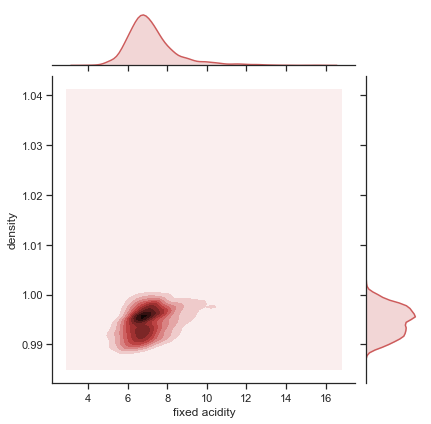

In [215]:
## TODO: create a KDE joint plot using seaborn
kdejoint = sns.jointplot(data=wines,
                          x='fixed acidity', 
                          y='density', 
                          kind='kde', 
                          color='indianred')

## Discrete Categorical Attributes

Let's make a histogram comparing red wine and white wine quality numbers!

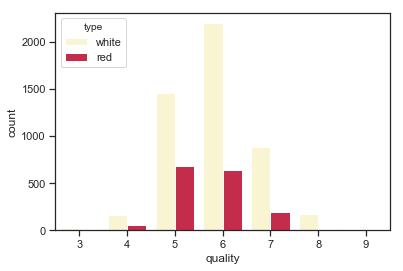

In [216]:
## TODO: create a histogram comparing red & white wine (i.e. countplot)
countplot = sns.countplot(data=wines, 
                          x="quality", 
                          hue="type", 
                          palette={"red": "crimson", "white": "lemonchiffon"})

## Mixed Attributes (Numeric & Categorical)

Let's try using `seaborn`'s facet plot to compare the citric acid content in white wine versus red wine.

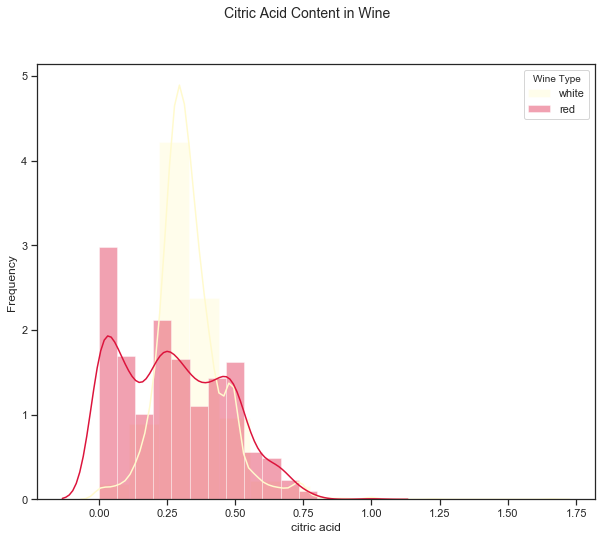

In [217]:
## initialize figure
fig = plt.figure(figsize=(10,8))
title = fig.suptitle("Citric Acid Content in Wine", fontsize=14)

ax = fig.add_subplot(111)
ax.set_xlabel("Citric Acid")
ax.set_ylabel("Frequency") 

## TODO: initialize facet grid
grid = sns.FacetGrid(data=wines, 
                  hue='type', 
                  palette={"red": "crimson", "white": "lemonchiffon"})

## add a kde plot
grid.map(sns.distplot, 'citric acid', kde=True, bins=15, ax=ax)

ax.legend(title='Wine Type')
plt.close(2)

Let's try making some box & violin plots!

Text(0,0.5,'Wine Alcohol %')

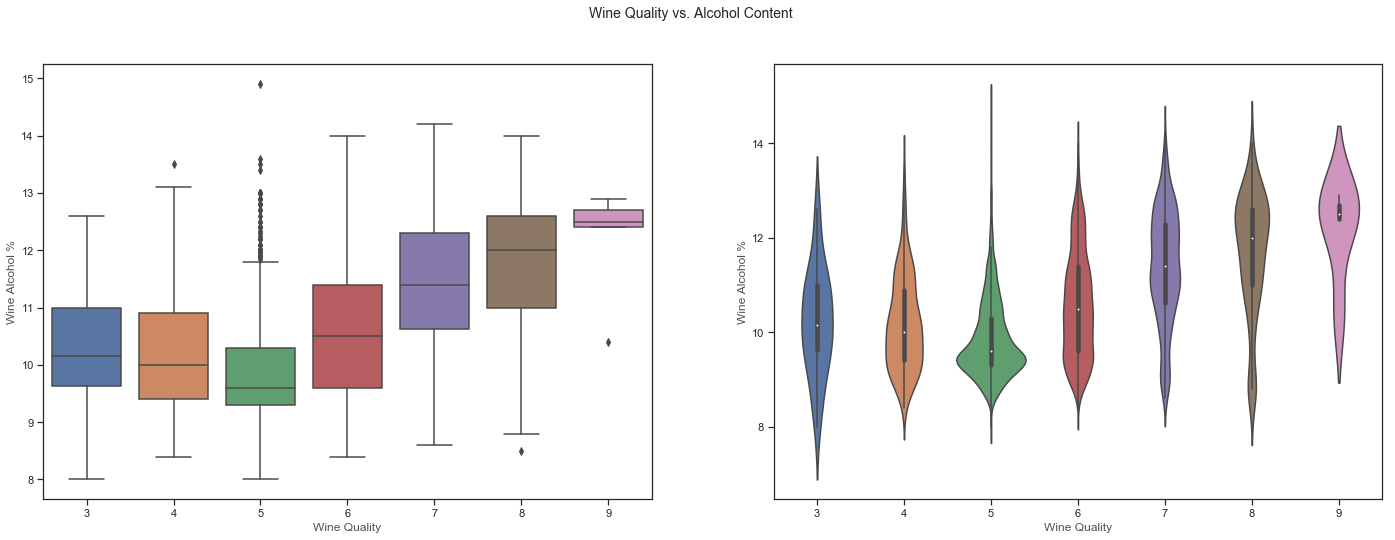

In [218]:
## set up figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
f.suptitle('Wine Quality vs. Alcohol Content', fontsize=14)

## TODO: create boxplot using seaborn
sns.boxplot(data=wines,  
            x="quality", 
            y="alcohol", 
            ax=ax1)

ax1.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)

## TODO: create violin plot using seaborn
sns.violinplot(data=wines,
               x="quality", 
               y="alcohol",   
               ax=ax2)

ax2.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)

# Multiple Dimension Visualization:

## 3D Visualization

Let's create a "3D" pairplot based on wine type!

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


Text(0.5,0.98,'Wine Attributes Pairwise Plots')

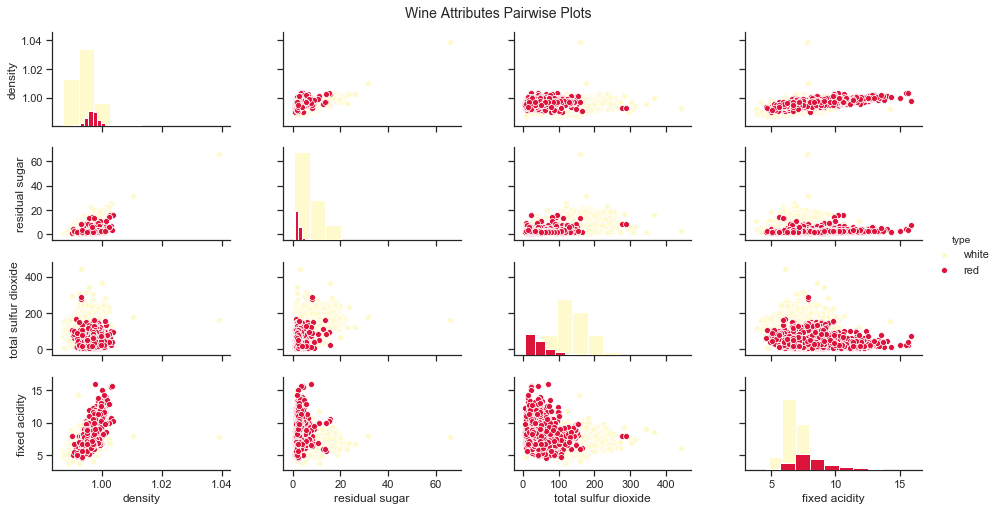

In [226]:
## attributes of interest
cols = ['density', 
        'residual sugar', 
        'total sulfur dioxide', 
        'fixed acidity', 
        'type']
  
## TODO: make 3D pairplot
pairplot = sns.pairplot(data=wines[cols], 
                  hue='type', 
                  size=1.8, aspect=1.8, 
                  palette={"red": "crimson", "white": "lemonchiffon"}, 
                  kind='scatter', 
                  diag_kind='hist')

## add figure
fig = pairplot.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

## 3D Continuous Numeric Attributes

Let's plot the relationship between acidity, alcohol & residual sugar

Text(0.5,1.05,'Wine Alcohol Content - Fixed Acidity - Residual Sugar')

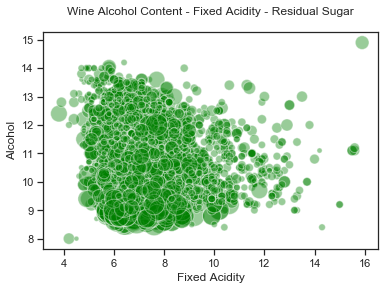

In [228]:
## use scatter!
plt.scatter(x = wines['fixed acidity'], 
            y = wines['alcohol'], 
            s = wines['residual sugar']*25, ## increases the size
            alpha=0.4, 
            edgecolors='w', 
            color='green')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar', y=1.05)

## 3D Discrete Categorical Attributes

Let's look at quality vs. quality label vs. wine type

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


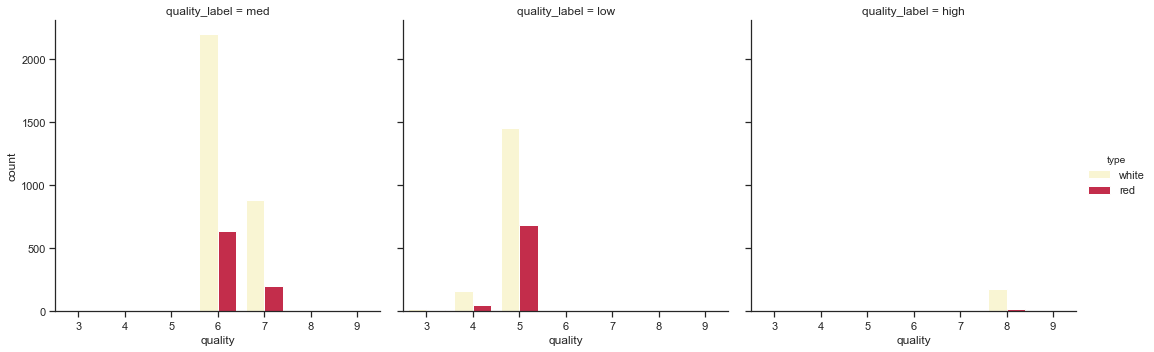

In [230]:
factorplot = sns.factorplot(x="quality", 
                    hue="type", 
                    col="quality_label", 
                    data=wines, 
                    kind="count",
                    palette={"red": "crimson", "white": "lemonchiffon"})

## 3D Mixed Attributes (Categorical & Numerical)

Let's look at the relationship between sulphates, alcohol, and wine type

* x-axis = sulphates
* y-axis = alcohol
* color = wine type

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


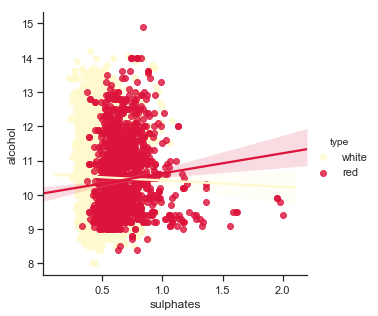

In [237]:
## TODO: make an lm joint plot using seaborn's lmplot
linearreg_jointplot = sns.lmplot(data=wines, 
                       x="sulphates", 
                       y="alcohol", 
                       size=4.5,
                       hue="type", 
                       palette={"red": "crimson", "white": "lemonchiffon"})

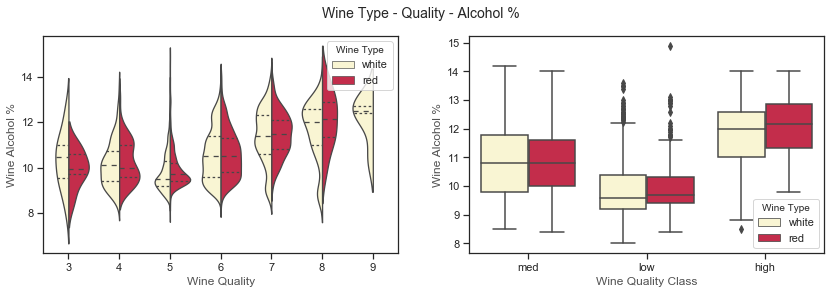

In [254]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol %', fontsize=14)

## TODO: create a violin plot
sns.violinplot(data=wines,
               x="quality", 
               y="alcohol", 
               hue="type", 
               split=True,
               palette={"red": "crimson", "white": "lemonchiffon"}, 
               inner="quart", linewidth=1.3,
               ax=ax1)

ax1.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)
ax1.legend(loc='best', title='Wine Type')

## TODO: create a boxplot
sns.boxplot(data=wines, 
            x="quality_label",
            y="alcohol", 
            hue="type", 
            palette={"red": "crimson", "white": "lemonchiffon"}, 
            ax=ax2)

ax2.set_xlabel("Wine Quality Class",size=12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)
plt.legend(loc='best', title='Wine Type')

## 6D Plotting!

Let's visualize this data in *6 dimensions*

1) x-axis
2) y-axis
3) color
4) n columns
5) size
6) m rows

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


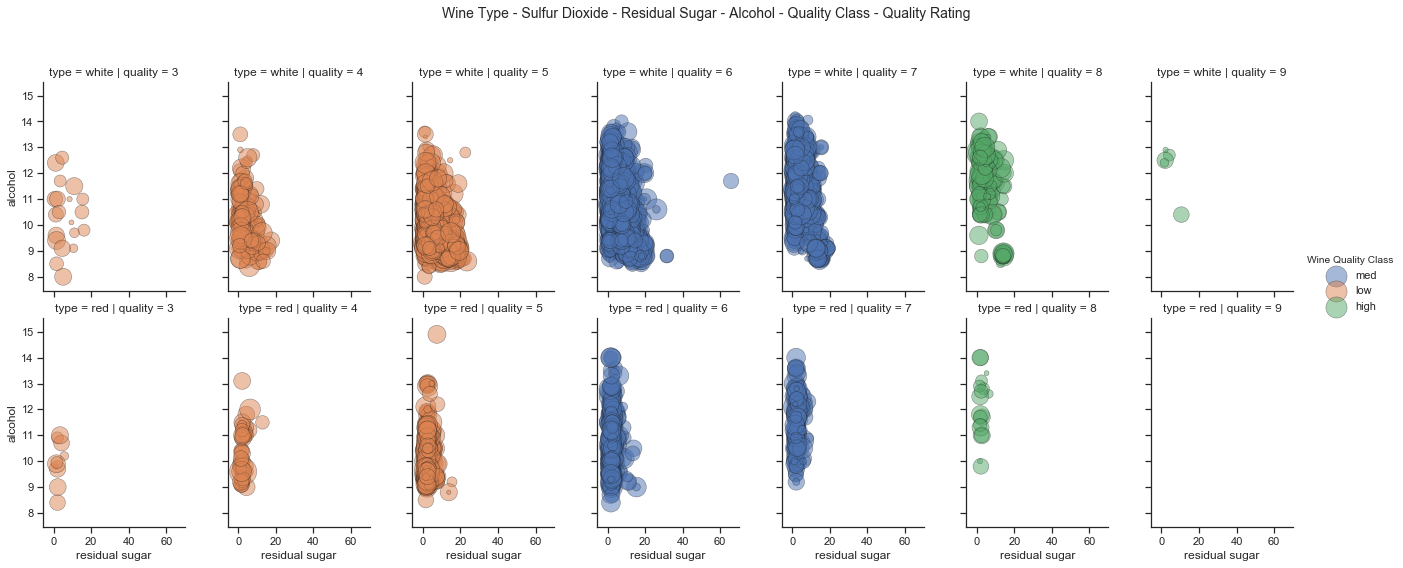

In [258]:
## TODO: fill in row, col, hue
grid = sns.FacetGrid(wines,
                  row='type', # row
                  col='quality', # column
                  hue='quality_label', # color
                  size=4)

## TODO: fill in x and y axis
grid.map(plt.scatter,
         'residual sugar', # x-axis
         'alcohol', # y-axis
         alpha=0.5, 
         edgecolor='k', 
         linewidth=0.5, 
         s=wines['total sulfur dioxide'] * 2) # size

fig = grid.fig 
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14)
grid.add_legend(title='Wine Quality Class')